<a href="https://colab.research.google.com/github/VinZCodz/machine-learning-works/blob/main/uni_variate_linear_regression/uni_variate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starting with far off predictions!


>Note! Please add other files given in the repo, to Files section of this notebook, for the all the things to work properly. Those are libraries used to run some routines.




Let's create a straight line function using x and y training data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train=np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_train=np.array([300, 500, 600, 800, 900])

print(f"x_train->{x_train}")
print(f"y_train->{y_train}")

# Plot the data points
plt.scatter(x_train, y_train, marker='*', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

Defining  method to give the model function f_wb

In [ ]:


def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

Lest call this method

In [ ]:
w=100;
b=100;

print(f"w: {w}")
print(f"b: {b}")

tmp_f_wb = compute_model_output(x=x_train, w=w, b=b)
print(f"tmp_f_wb->{tmp_f_wb}")


plt.plot(x_train, tmp_f_wb, c='b',label='Prediction')


plt.scatter(x_train, y_train, marker='*', c='r',label='Actual Values')


plt.title("Housing Prices")

plt.ylabel('Price (in 1000s of dollars)')

plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

For w=100; b=100;

the prediction of this straight locus is way off

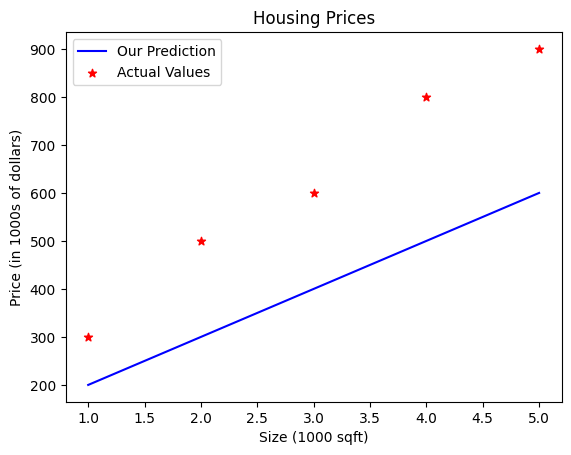

In [ ]:
y_predicted=w * 1200 + b

print(f"Predicted value of a 1200 sq.ft = {y_predicted}")

This prediction is way off! because the st. line has too much delta=high cost wrt to scatters of training data!

So lets the groom the value of w and b to make prediction accurecy!

# So lets experiment with "cost"

Lets cerate a compute cost funtion, for given x_train and y_train

Cost, J(w,b): The delta or error for predited value of y and the given/true value y, this error will be for all the true value y. Thus will take a avg. value to get to one ultimate cost J or the error.

Note1: Also, to increse the sentivity on small variation of w will have to take the squred error.


Note2: Then will decrease/normalize this squared error by taking double avg.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

def compute_cost(x , y, w, b):
  m=x.shape[0]
  cost_sum=0

  for i in range(m):
    f_wb=w*x[i]+b
    cost=f_wb-y[i]

    cost_sum=(cost_sum+cost)**2

  total_cost=cost_sum/(2*m)

  return total_cost

So now using the above squared error cost lets build an intution of variation against the value w while keeping b constant.

In [ ]:
plt_intuition(x_train,y_train)

So, I can observer couple of stuff here:
1. For higher values of w cost is high.
2. for very lower values of w cost is again high.
3. Only for some ranges of w the cost attains its lows/minima
4. Also, when the cost is at minima, I see the st. line passing/covergin almost all the taining data/true values.

Thus the problem now resolves to: to get that pefect convergent st.line I will need a minima of cost with appropriate value of w!!

So with the intution, I can understand the fact that:

**Goal of entire linear regression:** To find that value of w where the loss/sqaured error or simple put the cost is MINIMAL !!


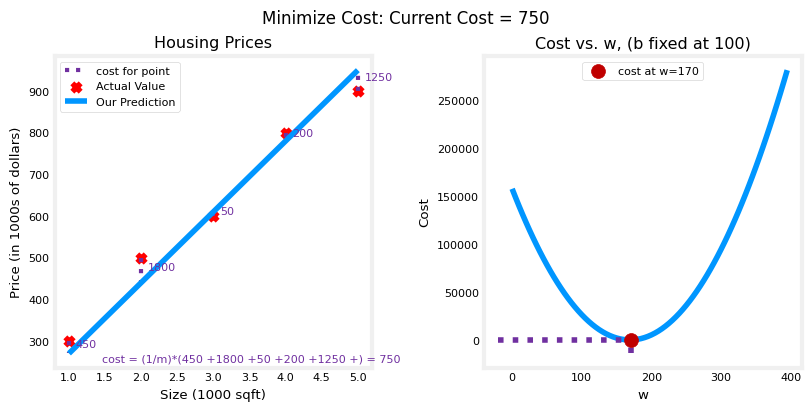


# And then there was b!

The below are non interactive graphs. But enough to see both varianting quantities, w and b for the training data.

In [ ]:
w=170
b=100

plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)

Below is a perfext covex graph, because I have squared error variantion and global minima!

In [ ]:
soup_bowl()

# Gradiant Descent: or should i say water flow.

According to me: My intitution is, its a way how water flows eventually into the valley in a hilloack region. or how current flows eventually towads potential diffrence.

Basically, its gradaully descent into local minima, thus this algorithm should help me to deduce the minma for the cost function! If i can code it.

In [ ]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

so here, with above intitution, i should be able to decrese the values of w and b gradually, so that the goal of linear regression is achived! that is to find minima for the cost function.

so equ is:
w = w - small values of change in (w)

b = b - small values of change in (b)

ergo:

w = w - dw

b = b - db

So, we need to flutuate small values dw on the graph of J(w) which is the cost and see how it aces against that, up untill it becomes a minimal value!!



> **If we make a tiny change to dw, what tiny change occurs in J(w)?**



## Differential to rescue: expressing small changes!

Intitution of "differential":

1. Infinitely small change in a variable
2. instantaneous rate of change
3. the slope of a tangent line at a given point.

In [ ]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

Simple equation of
```
dj_dw_i = (f_wb - y[i]) * x[i]
dj_db_i = f_wb - y[i]
```
obtained after calclating the equation of chnage of dJ(w) with smaller chnages in dw.

Similiarly, what changes in dJ(w) occurs when you chnage smaller values in db.

In [ ]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Lets do this for multiple iterations. By staring at
```
w_init = 0
b_init = 0
```



# Jumps (learning rate) and Final run!

Learning rate: This is to how fast we want to move that slider.

> Higher this value, sooner the descent!!

you might miss the local minima if its kept high. Like a bounce ball.

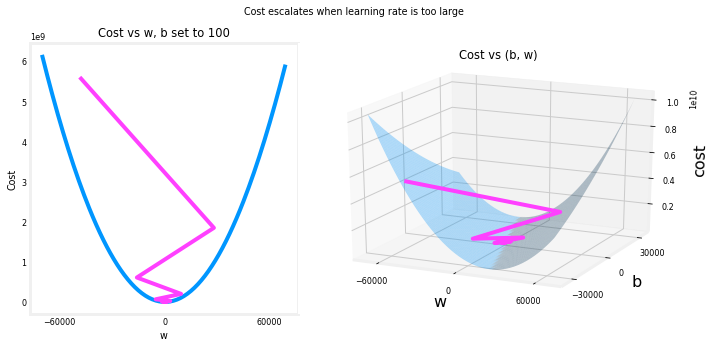

So lets club all this and do one Final run to find w and b which keeps J(w, b) cost function small and st.line passing almost on all the training values with less squared cost!!! Need to do this over several itrations and in each iteration on all training data.

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

    # initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Eureka! ha ha (as if its my discovery!) very much pun

anyways, by iteration found

**`(w,b) found by gradient descent: (150.0000,170.0000)`** !!!

In [ ]:
w=150.0000
b=170.0000

tmp_f_wb = compute_model_output(x=x_train, w=w, b=b)

plt.plot(x_train, tmp_f_wb, c='b',label='Prediction')
plt.scatter(x_train, y_train, marker='*', c='r',label='Actual Values')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# **Perrrrfectoooo!!!**

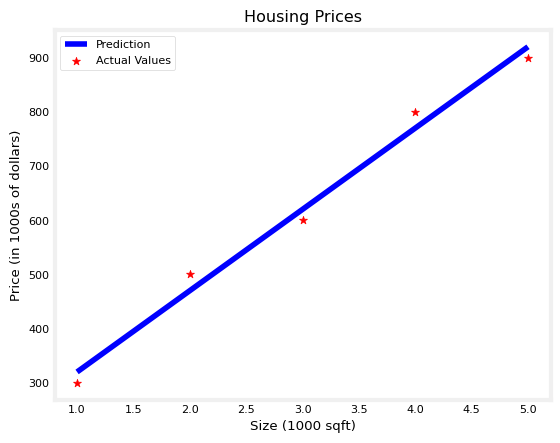